In [1]:
import pandas as pd

In [2]:
import numpy as np


In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
%matplotlib inline

In [8]:
train=pd.read_csv('titanic_train.csv')

In [9]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: >

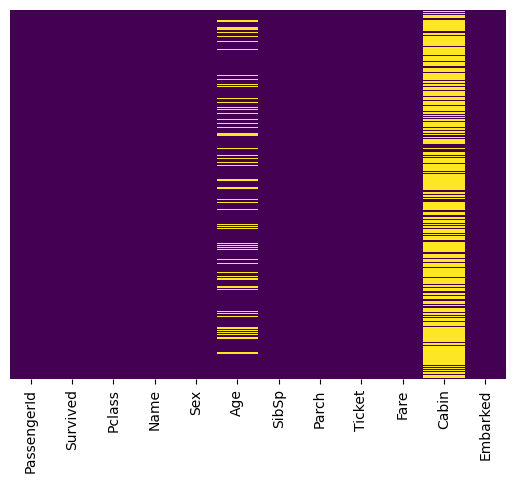

In [12]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [13]:
sns.set_style("whitegrid")

<Axes: xlabel='Survived', ylabel='count'>

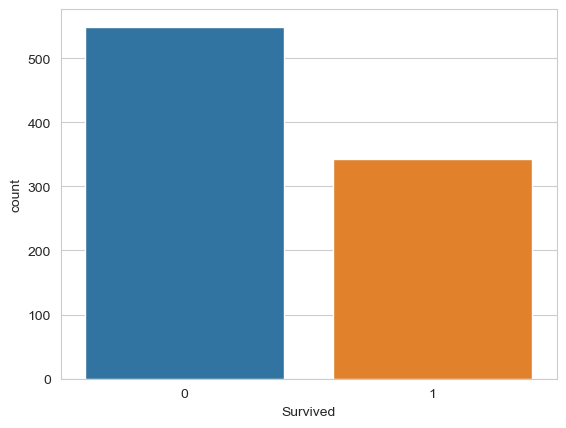

In [14]:
sns.countplot(x='Survived',data=train)

<Axes: xlabel='Survived', ylabel='count'>

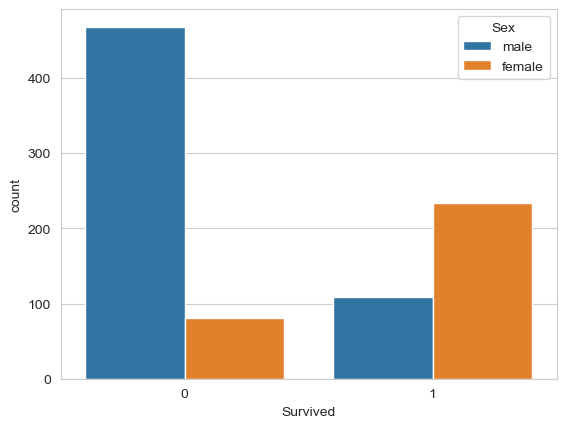

In [17]:
sns.countplot(x='Survived',hue="Sex",data=train)

<Axes: xlabel='Survived', ylabel='count'>

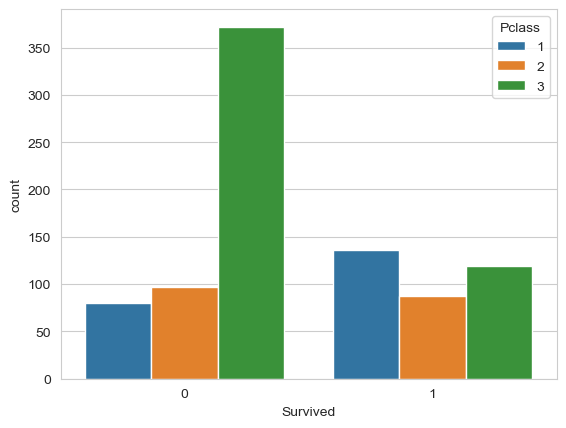

In [18]:
sns.countplot(x='Survived',hue="Pclass",data=train)

/var/folders/3t/vth7cfw15y1fg21fr195ch1r0000gn/T/ipykernel_4832/2747699129.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'].dropna(),kde=False,bins=30)


<Axes: xlabel='Age'>

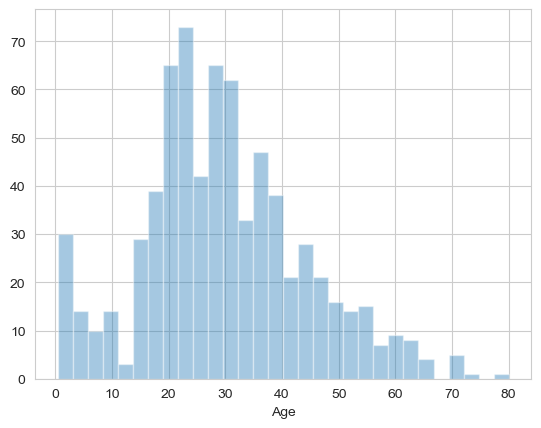

In [21]:
sns.distplot(train['Age'].dropna(),kde=False,bins=30)

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: xlabel='SibSp', ylabel='count'>

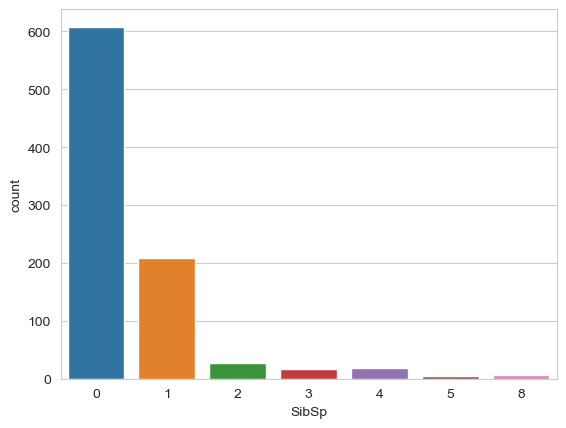

In [26]:
sns.countplot(x="SibSp",data=train)

<Axes: >

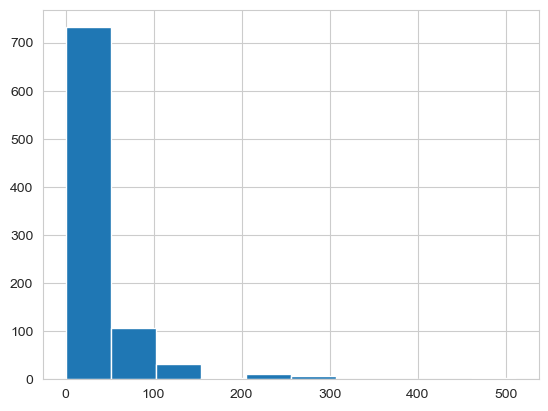

In [28]:
train['Fare'].hist()

In [29]:
import cufflinks as cf

In [30]:
cf.go_offline()

In [32]:
train['Fare'].iplot(kind='hist',bins=50)

<Axes: xlabel='Pclass', ylabel='Age'>

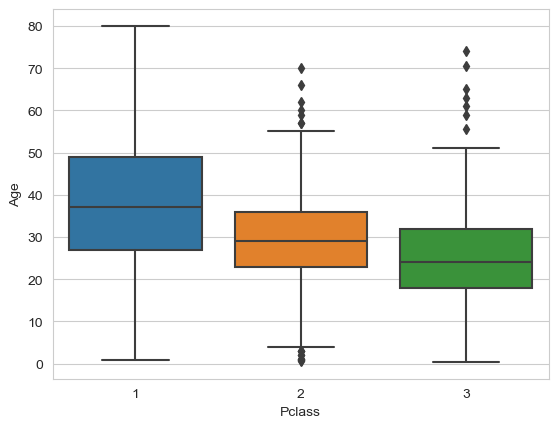

In [33]:
sns.boxplot(x="Pclass",y='Age',data=train)

In [50]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age
    
            

In [51]:
train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)

<Axes: >

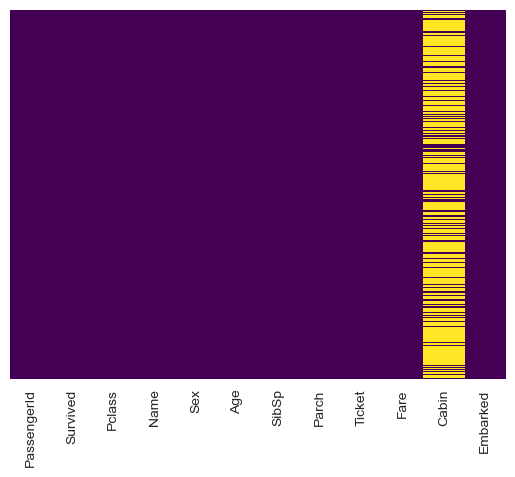

In [52]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [55]:
train.drop('Cabin',axis=1,inplace=True)

In [56]:
train.dropna(inplace=True)

<Axes: >

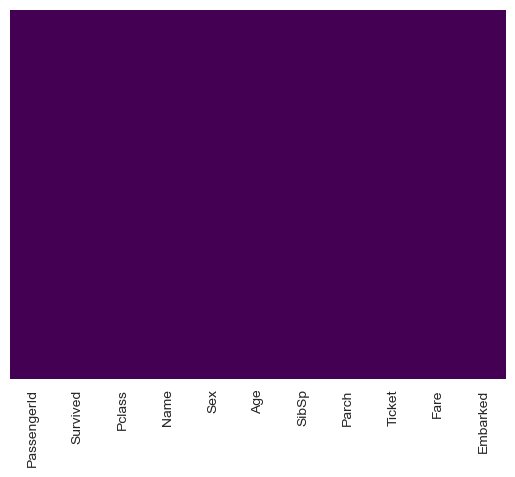

In [57]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [59]:
#Convert into dummy variable

In [62]:
sex=pd.get_dummies(train['Sex'],drop_first=True)

In [63]:
#remove multicollinarity


In [66]:
embark=pd.get_dummies(train['Embarked'],drop_first=True)

In [67]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [69]:
train=pd.concat([train,sex,embark],axis=1)

In [70]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [72]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [73]:
train.drop('PassengerId',axis=1,inplace=True)

In [74]:
X=train.drop('Survived',axis=1)
y=train['Survived']

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [77]:
from sklearn.linear_model import LogisticRegression

In [78]:
logmodel=LogisticRegression()

In [80]:
logmodel.fit(X_train,y_train)

/Users/sourabh/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [84]:
predictions=logmodel.predict(X_test)

In [85]:
from sklearn.metrics import classification_report

In [86]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       174
           1       0.83      0.68      0.74       120

    accuracy                           0.81       294
   macro avg       0.81      0.79      0.80       294
weighted avg       0.81      0.81      0.81       294



In [87]:
from sklearn.metrics import confusion_matrix

In [88]:
confusion_matrix(y_test,predictions)

array([[157,  17],
       [ 39,  81]])